# FDM
## Assignment 1 - Preprocessing
### *Mohammad Sulaiman Behzad (9622762453) & Fahim Jafari (9522762499)*

Imports

In [134]:
import pandas as pd                #library for load data and work with it easily
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.gridspec  import GridSpec
import numpy as np

import logging

in this class we can load dataset into dataframes and with its methods visualize boxplot and table also can remove dataset

In [135]:
class Data:

    def __init__(self):
        self.Usage = "prepare or load data inot structres"
        self.data_frames = {}

    #this module load datas into data frames pandas and returns it
    def load_into_DFrames(self,data_list):
        for data_name in data_list:
            if data_list[data_name] == 'xlsx':
                self.data_frames[data_name] = pd.read_excel(data_name+'.'+data_list[data_name])
            elif data_list[data_name] == 'csv':
                self.data_frames[data_name] = pd.read_csv(data_name+'.'+data_list[data_name])        
        return self.data_frames

    #this module remove multiple data frames from df_list ,usage for free up memory
    def remove_from_DFrames(self,data_list):
        for data_name in data_list:
            self.data_frames.pop(data_name)

    # this module plot boxplot for given attrs from data frame
    def boxPlot(self,dataFrame,df_name,attrs,figsize=(10,10)):
        height_layout = int(len(attrs)*3)                               #height for each attribute in one row       
        fig = plt.figure(constrained_layout=True,figsize=figsize)       #create figure with specific size
        gs = GridSpec(height_layout,2,figure=fig,wspace=0.025,hspace=0.05)                       #create gridspec for flexible layout in figure          
        # iterate over each attribute and plots its boxplot and a table that contains important statical indexes
        for i in range(0,len(attrs)):
            pos_in_table = int(i*2)
            #table
            min_value,q1,mean,q3,max_value = dataFrame[attrs[i]].quantile([0,0.25,0.5,0.75,1])
            ax11 = fig.add_subplot(gs[pos_in_table:pos_in_table+2,1])                     #create a subplot for table with favourite  
            ax11.set_axis_off()                                            #remove axis of table subplot
            # create data of table with two columns and 9 rows
            data = [
                ['attribute',attrs[i]],
                ['type',''],
                ['range',str(min_value)+'-\n'+str(max_value)],
                ['min',min_value],
                ['max',max_value],
                ['mean',mean],
                ['mode',dataFrame[attrs[i]].mode()[0:min(3,len(dataFrame[attrs[i]].mode())) ].to_string()],
                ['median',dataFrame[attrs[i]].median()],
                ['outliers','']
            ]
            t1 = ax11.table(cellText=data,loc='center')
            t1.scale(1,3)                                                  #scale the table with your own choice

            #boxplot
            ax1_top = fig.add_subplot(gs[pos_in_table,0])       #create a subplot for boxplot with favourite size
            ax1_top.boxplot(dataFrame[attrs[i]], patch_artist=True)            # boxplot for specific attribute
            ax1_down = fig.add_subplot(gs[pos_in_table+1,0])       #create a subplot for boxplot with favourite size
            ax1_down.boxplot(dataFrame[attrs[i]], patch_artist=True)            # boxplot for specific attribute
            ax1_top.set_ylim(q3+(2*(q3-q1)),1.2*max_value)
            ax1_down.set_ylim(min_value-(mean-q1),q3+(2*(q3-q1)))
            ax1_top.spines['bottom'].set_visible(False)
            ax1_down.spines['top'].set_visible(False)

            d = .015  # how big to make the diagonal lines in axes coordinates
            # arguments to pass to plot, just so we don't keep repeating them
            kwargs = dict(transform=ax1_top.transAxes, color='k', clip_on=False)
            ax1_top.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
            ax1_top.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

            kwargs.update(transform=ax1_down.transAxes)  # switch to the bottom axes
            ax1_down.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
            ax1_down.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
        gs.update(wspace=0,hspace=0)
        fig.savefig(df_name+'/'+str(attrs))
        plt.show()





In [136]:
def box_plot_table(df_name,attributes):
    for attr in attributes:
        data.boxPlot(data_frames[df_name],df_name,[attr])


# VALIDATION

## understanding the data and performing some statistics 

### PRODUCT TABLE

#### read product dataset

In [137]:
data = Data()
data_frames = data.load_into_DFrames({'product':'xlsx'})
data_frames['product'].head(3)

,id,product_title_fa,product_title_en,url_code,title_alt,category_title_fa,category_keywords,brand_name_fa,brand_name_en,product_attributes
0,723302,ماگ حرارتی لومانا مدل عرفانه کد MAG1042,NaN,ماگ-حرارتی-لومانا-مدل-عرفانه-کد-mag1042,mug، لیوان ، ماگ ، فنجان ، لیوان دسته دار ، لومانا ، ماگ لومانا ، lomana ، lomana mug ، ئشل ، سرامیک ، ماگ سرامیکی ، لیوان سرامیک,ماگ، لیوان و فنجان,ماگ، لیوان و فنجان CupandMug,لومانا,Lomana,"[{""Key"":""وزن بسته‌بندی"",""Value"":""480""},{""Key"":""جنس"",""Value"":""سرامیک""},{""Key"":""ابعاد بسته‌بندی"",""Value"":""13 × 12 × 9""},{""Key"":""ابعاد"",""Value"":""8 × 10""},{""Key"":""در""},{""Key"":""تعداد"",""Value"":""یک عدد""}..."
1,727089,ست آبکش و آبگیر تیتیز مدل AP-9141 سایز متوسط,NaN,ست-آبکش-و-آبگیر-تیتیز-مدل-ap-9141-سایز-متوسط,";hsi, steel, کاسه، کاسه بامبو، لگن، کالا خانه تهران، Basin, Tehran hg, Perani، آبکش، سرویس آبکش، آبکش و کاسه، پلاستیکی",آبکش و آبگیر,آبکش و آبگیر VirgoBasin,تیتیز,Titiz,"[{""Key"":""دستگیره"",""Value"":""1 جفت""},{""Key"":""نوع"",""Value"":""ست آبکش و آبگیر""},{""Key"":""سایر توضیحات"",""Value"":""- دارای آبکش به قطر 24 و احتساب دسته 27 و ارتفاع 9 سانتی متر به وزن 119 گرم\r\n- دارای کاس..."
2,727096,روغن مرطوب کننده کدلی مدل Divine oil حجم 50 میلی لیتر,NaN,روغن-مرطوب-کننده-کدلی-مدل-divine-oil-حجم-50-میلی-لیتر,NaN,روغن صورت,روغن صورت Face-Oil,کدلی,CAUDALIE,"[{""Key"":""حجم"",""Value"":""50""},{""Key"":""نوع عصاره"",""Value"":""حاوی روغن هسته انگور ارگانیک، روغن آرگان، روغن کنجد و شی باتر""},{""Key"":""عصاره"",""Value"":""دارد""},{""Key"":""ویژگی"",""Value"":""ضد چروک""},{""Key"":""ویت..."


###### id

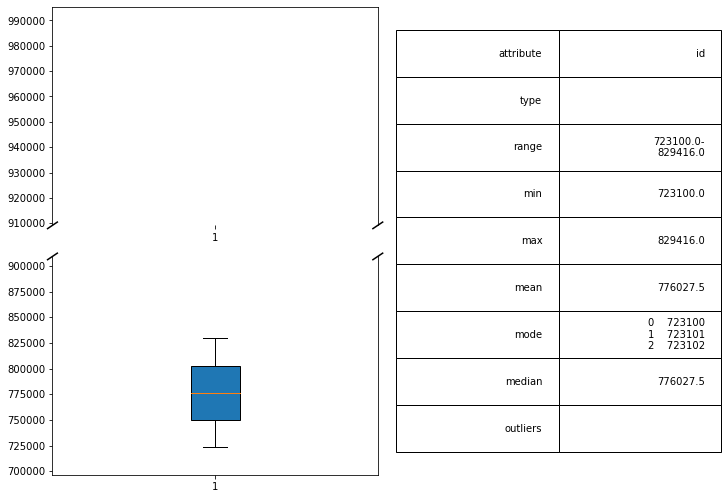

In [138]:
attributes = ['id']
box_plot_table('product',attributes)

###### PRODUCT TITLE FA
obtain the length of product title fa and visualize its boxplot

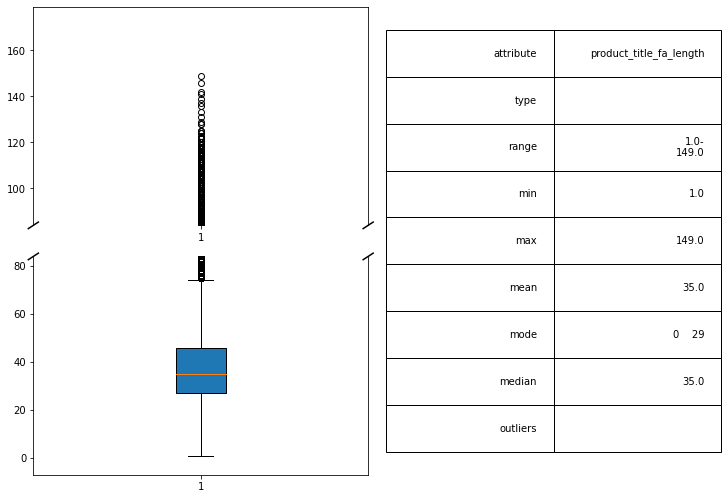

In [139]:
products = data.data_frames['product']
products['product_title_fa_length'] = products['product_title_fa'].str.len()
attributes = ['product_title_fa_length']
box_plot_table('product',attributes)

In [140]:
pd.options.display.max_colwidth = 200
null_values_product_title_fa = products[(products['product_title_fa']=="NaN") ]     # missing values
not_valid_product_title_fa = products[ (products['product_title_fa_length']<=3) ]   # not valid values
not_correct_product_title_fa = products[ (products['product_title_fa_length']<=10) & (products['product_title_fa'].str.split().str.len() <= 1) ]    #not correct values
print("there are {} values for product title fa that are not valid vlues ".format(len(not_valid_product_title_fa)))
print("there are {} values for product title fa that are not corrcet ".format(len(not_correct_product_title_fa)))
print("percentage of not correct for product title fa : {}".format(len(not_correct_product_title_fa)/len(products)))   #calculate precentage of not correct
print("percentage of not valid for product title fa : {}".format(len(not_valid_product_title_fa)/len(products)))       #calculate precentage of not valid
# logging the previous data that is printed
logging.basicConfig(filename='product/info.log', level=logging.DEBUG)
logging.info("there are {} values for product title fa that are not valid vlues ".format(len(not_valid_product_title_fa)))
logging.info("there are {} values for product title fa that are not corrcet ".format(len(not_correct_product_title_fa)))
logging.info("percentage of not correct for product title fa : {}".format(len(not_correct_product_title_fa)/len(products)))
logging.info("percentage of not valid for product title fa : {}".format(len(not_valid_product_title_fa)/len(products)))
not_valid_product_title_fa.head(5)

there are 27 values for product title fa that are not valid vlues 
there are 115 values for product title fa that are not corrcet 
percentage of not correct for product title fa : 0.00115
percentage of not valid for product title fa : 0.00027


,id,product_title_fa,product_title_en,url_code,title_alt,category_title_fa,category_keywords,brand_name_fa,brand_name_en,product_attributes,product_title_fa_length
4578,738970,جع\,NaN,جع,جعبه،کمک اولیه،,جعبه کمک‌های اولیه,جعبه کمک‌های اولیه First-Aid-Kit,متفرقه,Miscellaneous,NaN,3
8222,815867,11,NaN,11,NaN,دفتر,دفتر Notebook,متفرقه,Miscellaneous,NaN,2
8362,781592,.,.,NaN,.,گروه کالاهای اشتباه,NaN,متفرقه,Miscellaneous,NaN,1
9184,785160,.,.,NaN,.,گروه کالاهای اشتباه,NaN,متفرقه,Miscellaneous,NaN,1
16601,781585,.,.,NaN,.,گروه کالاهای اشتباه,NaN,متفرقه,Miscellaneous,NaN,1


###### set values that their length is smaller than 3 for validation
###### set values that their length are smaller than 10 and are one word for correctness

In [141]:
products.loc[ (products['product_title_fa_length']<=3) ,'product_title_fa'] = np.nan         #replace non valid with nan number
products.loc[ (products['product_title_fa_length']<=10) & (products['product_title_fa'].str.split().str.len() <= 1) ,'product_title_fa'] = np.nan  #replace non correct with nan nuber
products[ (products['product_title_fa_length']<=10) ].head(50)

,id,product_title_fa,product_title_en,url_code,title_alt,category_title_fa,category_keywords,brand_name_fa,brand_name_en,product_attributes,product_title_fa_length
84,723497,NaN,NaN,خراب,حوله استخری،حوله استخری چاپی، حوله استخری مردانه،حوله باشگاهی،حوله استخری مخمل,حوله,حوله Towel,متفرقه,Miscellaneous,"[{""Key"":""سایر توضیحات"",""Value"":""بهتر است برای اولین بار و قبل از استفاده، حوله را یکبار بشوئید\r\nدر ماشین لباسشویی با آب حداکثر 30 درجه\r\nترجیحاً برای شستشو از پودر بدون آنزیم، صابون مایع و نرم‌...",4
101,723584,NaN,NaN,خراب,حوله استخری،حوله استخری چاپی، حوله استخری مردانه،حوله باشگاهی،حوله استخری مخمل,حوله,حوله Towel,متفرقه,Miscellaneous,"[{""Key"":""سایر توضیحات"",""Value"":""بهتر است برای اولین بار و قبل از استفاده، حوله را یکبار بشوئید\r\nدر ماشین لباسشویی با آب حداکثر 30 درجه\r\nترجیحاً برای شستشو از پودر بدون آنزیم، صابون مایع و نرم‌...",4
189,723510,NaN,NaN,خراب,حوله استخری،حوله استخری چاپی، حوله استخری مردانه،حوله باشگاهی،حوله استخری مخمل,حوله,حوله Towel,متفرقه,Miscellaneous,"[{""Key"":""نوع"",""Value"":""حوله استخری""},{""Key"":""جیب"",""Value"":""ندارد""},{""Key"":""سایر توضیحات"",""Value"":""بهتر است برای اولین بار و قبل از استفاده، حوله را یکبار بشوئید\r\nدر ماشین لباسشویی با آب حداکثر 3...",4
224,723411,NaN,NaN,خراب,حوله استخری،حوله استخری چاپی، حوله استخری مردانه،حوله باشگاهی،حوله استخری مخمل,حوله,حوله Towel,متفرقه,Miscellaneous,"[{""Key"":""جیب"",""Value"":""ندارد""},{""Key"":""وزن"",""Value"":""350""},{""Key"":""ابعاد"",""Value"":""75x150""},{""Key"":""سایر توضیحات"",""Value"":""بهتر است برای اولین بار و قبل از استفاده، حوله را یکبار بشوئید\r\nدر ماشی...",4
230,723585,NaN,NaN,خراب,حوله استخری،حوله استخری چاپی، حوله استخری مردانه،حوله باشگاهی،حوله استخری مخمل,حوله,حوله Towel,میکرولب,Microlab,"[{""Key"":""سایز"",""Value"":""بزرگ""},{""Key"":""تعداد تکه"",""Value"":""یک تکه""},{""Key"":""سایر توضیحات"",""Value"":""بهتر است برای اولین بار و قبل از استفاده، حوله را یکبار بشوئید\r\nدر ماشین لباسشویی با آب حداکثر ...",4
299,723575,NaN,NaN,خراب,حوله استخری،حوله استخری چاپی، حوله استخری مردانه،حوله باشگاهی،حوله استخری مخمل,حوله,حوله Towel,متفرقه,Miscellaneous,"[{""Key"":""جیب"",""Value"":""ندارد""},{""Key"":""جنس"",""Value"":""پنبه""},{""Key"":""نوع"",""Value"":""حوله استخری""},{""Key"":""سایر توضیحات"",""Value"":""بهتر است برای اولین بار و قبل از استفاده، حوله را یکبار بشوئید\r\nدر ...",4
467,723507,NaN,NaN,خراب,حوله استخری،حوله استخری چاپی، حوله استخری مردانه،حوله باشگاهی،حوله استخری مخمل,حوله,حوله Towel,متفرقه,Miscellaneous,"[{""Key"":""ابعاد"",""Value"":""75x150""},{""Key"":""نوع"",""Value"":""حوله استخری""},{""Key"":""تعداد تکه"",""Value"":""یک تکه""},{""Key"":""تعداد جیب"",""Value"":""""},{""Key"":""جیب"",""Value"":""ندارد""},{""Key"":""سایز"",""Value"":""بزرگ""...",4
612,723591,NaN,NaN,خراب,حوله استخری،حوله استخری چاپی، حوله استخری مردانه،حوله باشگاهی،حوله استخری مخمل,حوله,حوله Towel,متفرقه,Miscellaneous,"[{""Key"":""تعداد تکه"",""Value"":""یک تکه""},{""Key"":""وزن"",""Value"":""350""},{""Key"":""سایر توضیحات"",""Value"":""بهتر است برای اولین بار و قبل از استفاده، حوله را یکبار بشوئید\r\nدر ماشین لباسشویی با آب حداکثر 30...",4
865,723514,NaN,NaN,خراب,حوله استخری،حوله استخری چاپی، حوله استخری مردانه،حوله باشگاهی،حوله استخری مخمل,حوله,حوله Towel,متفرقه,Miscellaneous,"[{""Key"":""جنس"",""Value"":""پنبه""},{""Key"":""تعداد تکه"",""Value"":""یک تکه""},{""Key"":""نوع"",""Value"":""حوله استخری""},{""Key"":""سایز"",""Value"":""بزرگ""},{""Key"":""تعداد جیب"",""Value"":""""},{""Key"":""جیب"",""Value"":""ندارد""},{""...",4
867,723516,NaN,NaN,خراب,حوله استخری،حوله استخری چاپی، حوله استخری مردانه،حوله باشگاهی،حوله استخری مخمل,حوله,حوله Towel,متفرقه,Miscellaneous,"[{""Key"":""سایز"",""Value"":""بزرگ""},{""Key"":""وزن"",""Value"":""350""},{""Key"":""تعداد جیب"",""Value"":""""},{""Key"":""سایر توضیحات"",""Value"":""بهتر است برای اولین بار و قبل از استفاده، حوله را یکبار بشوئید\r\nدر ماشین ...",4


##### PRODUCT TITLE EN

###### obtain the length of product title en 

In [142]:
products['product_title_en_length'] = products['product_title_en'].str.len()
not_valid_product_title_en = products[ (products['product_title_en_length']<=2) ]      # not valid values
not_correct_product_title_en = products[ (products['product_title_en_length']<=3) ]    # not correct values
print("there are {} values for product title en that are not valid vlues ".format(len(not_valid_product_title_en)))
print("there are {} values for product title en that are not corrcet ".format(len(not_correct_product_title_en)))
print("percentage of not correct for product title en : {}".format(len(not_correct_product_title_en)/len(products)))   #calculate precentage of not correct
print("percentage of not valid for product title en : {}".format(len(not_valid_product_title_en)/len(products)))       #calculate precentage of not valid
# logging the previous data that is printed
logging.basicConfig(filename='product/info.log', level=logging.INFO)
logging.info("there are {} values for product title en that are not valid vlues ".format(len(not_valid_product_title_en)))
logging.info("there are {} values for product title en that are not corrcet ".format(len(not_correct_product_title_en)))
logging.info("percentage of not correct for product title en : {}".format(len(not_correct_product_title_en)/len(products)))
logging.info("percentage of not valid for product title en : {}".format(len(not_valid_product_title_en)/len(products)))
not_valid_product_title_en.head(30)

there are 781 values for product title en that are not valid vlues 
there are 821 values for product title en that are not corrcet 
percentage of not correct for product title en : 0.00821
percentage of not valid for product title en : 0.00781


,id,product_title_fa,product_title_en,url_code,title_alt,category_title_fa,category_keywords,brand_name_fa,brand_name_en,product_attributes,product_title_fa_length,product_title_en_length
1822,724740,کتاب صوتی چهل نامه به ماه اثر عباس نادری,/,کتاب-صوتی-چهل-نامه-به-ماه-اثر-عباس-نادری,"کتاب صوتی , چهل نامه به ماه , عباس نادری",کتاب صوتی,کتاب صوتی Audio-Book,نوین کتاب گویا,Novin Ketab,"[{""Key"":""مدت"",""Value"":""65""},{""Key"":""گروه سنی"",""Value"":""بزرگسال""},{""Key"":""چکیده"",""Value"":""""},{""Key"":""نویسنده""},{""Key"":""سایر توضیحات"",""Value"":""""},{""Key"":""گوینده""},{""Key"":""مترجم"",""Value"":""\/""},{""Key""...",40,1.0
2130,724805,کتاب صوتی بی دل هوا اثر زهرا سعیدی,/,کتاب-صوتی-بی-دل-هوا-اثر-زهرا-سعیدی,"کتاب صوتی , بی دل هوا , زهرا سعیدی",کتاب صوتی,کتاب صوتی Audio-Book,نوین کتاب گویا,Novin Ketab,"[{""Key"":""مترجم"",""Value"":""\/""},{""Key"":""شماره مجوز"",""Value"":""\/""},{""Key"":""نمونه قابل دانلود""},{""Key"":""گوینده"",""Value"":""زهرا سعیدی""},{""Key"":""عنوان"",""Value"":""بی دل هوا""},{""Key"":""گوینده""},{""Key"":""خلاصه...",34,1.0
2477,724756,تی شرت مردانه طرح Cr7,21,تی-شرت-مردانه-طرح-cr7,فوتبال،ایتالیا،یوونتوس،کریستیانورونالدو،تیشرت،تی شرت،ایران،cr7،Juventus،ronaldo،بومرنگ،uefa,تی‌شرت و پولوشرت مردانه,تی‌شرت و پولوشرت مردانه mens-polos-tshirts,متفرقه,Miscellaneous,"[{""Key"":""وزن"",""Value"":""250""},{""Key"":""آستین"",""Value"":""کوتاه""},{""Key"":""جیب"",""Value"":""ندارد""},{""Key"":""سایر توضیحات"",""Value"":""""},{""Key"":""جنس"",""Value"":""پنبه""},{""Key"":""کشور مبدا برند"",""Value"":""ایران""},{...",21,2.0
3427,821141,کتاب کار عربی پایه هفتم اثر حبیب‌الله درویش,/,کتاب-کار-عربی-پایه-هفتم-اثر-حبیبالله-درویش,"9786006676517 , خیلی سبز",کتاب چاپی,کتاب چاپی Book,خیلی سبز,Kheilisabz,NaN,43,1.0
3652,809926,کتاب مد و لباس در قلمرو هنر مفهومی اثر شیرین عابدینی زاده,.,کتاب-مد-و-لباس-در-قلمرو-هنر-مفهومی-اثر-شیرین-عابدینی-زاده,"مد و لباس, پوشاک , 9786001522048 شیرین عابدی",کتاب چاپی,کتاب چاپی Book,متفرقه,Miscellaneous,NaN,57,1.0
3692,821237,کتاب آموزش حسابان 1 پایه یازدهم اثر محمدرضا توجه,/,کتاب-آموزش-حسابان-1-پایه-یازدهم-اثر-محمدرضا-توجه,"9786004124416,خیلی سبز",کتاب چاپی,کتاب چاپی Book,خیلی سبز,Kheilisabz,NaN,48,1.0
3778,820922,کتاب ماجرا زمین شناسی پایه یازدهم اثر حمید خزایی,/,کتاب-ماجرا-زمین-شناسی-پایه-یازدهم-اثر-حمید-خزایی,"9786004123150,خیلی سبز",کتاب چاپی,کتاب چاپی Book,خیلی سبز,Kheilisabz,NaN,48,1.0
3960,729524,کتاب قایم موشک با تصویرهای پنهان 5 اثر فرزانه کریمی,/,کتاب-قایم-موشک-با-تصویرهای-پنهان-5-اثر-فرزانه-کریمی,"موسسه نشر و تحقیقات ذکر , بازی کنیم و یاد بگیریم , پیش دبستانی , کتاب رنگ آمیزی , 9789643079239",کتاب چاپی,کتاب چاپی Book,نشر ذکر,Zekr,NaN,51,1.0
4093,730065,کتاب لباس ها اثر سارا خرامان,/,کتاب-لباس-ها-اثر-سارا-خرامان,انتشارات شهر قلم - 9786003201033,کتاب چاپی,کتاب چاپی Book,انتشارات شهر قلم,Shahreh Ghalam Pub,NaN,28,1.0
4146,817905,کتاب رهایی از استرس اثر مایکلین ماندی,/,کتاب-رهایی-از-استرس-اثر-مایکلین-ماندی,NaN,کتاب چاپی,کتاب چاپی Book,انتشارات صابرین,Saberin Book Pub,NaN,37,1.0


###### set values that their length is smaller than 2 for validation
###### set values that their length are smaller than 4 for correctness

In [143]:
products.loc[ (products['product_title_en_length']<=2) ,'product_title_en'] = np.nan         #replace not valid with nan number
products.loc[ (products['product_title_en_length']<=3) ,'product_title_en'] = np.nan         #replace not corrcet with nan number

###### URL CODE
###### obtain the length of url code

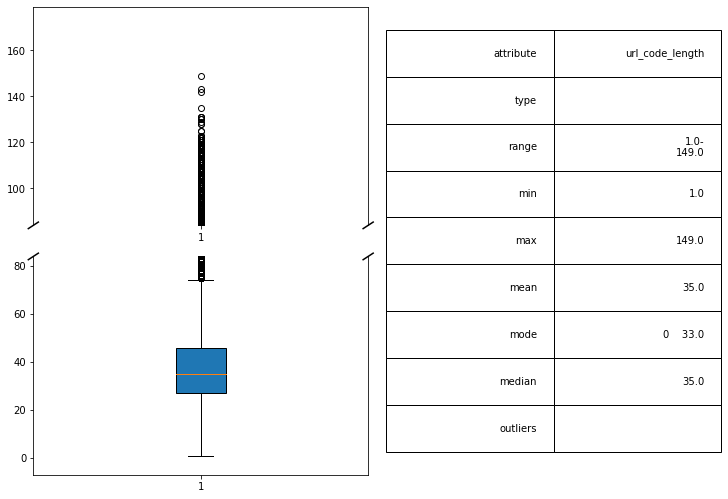

In [144]:
products['url_code_length'] = products['url_code'].str.len()
products.loc[ (products['url_code_length'].isnull()) ,'url_code_length'] = 1

# TODO: replce 2 line below with below that
attributes = ['url_code_length']
box_plot_table('product',attributes)


###### those values that their length are smaller than 3 are not valid so are set to nan

In [145]:
not_valid_url_code = products[ (products['url_code_length']<3) ]      # not valid values

In [146]:
products.loc[ (products['url_code_length']<3) ,'url_code'] = np.nan

###### TITLE ALT

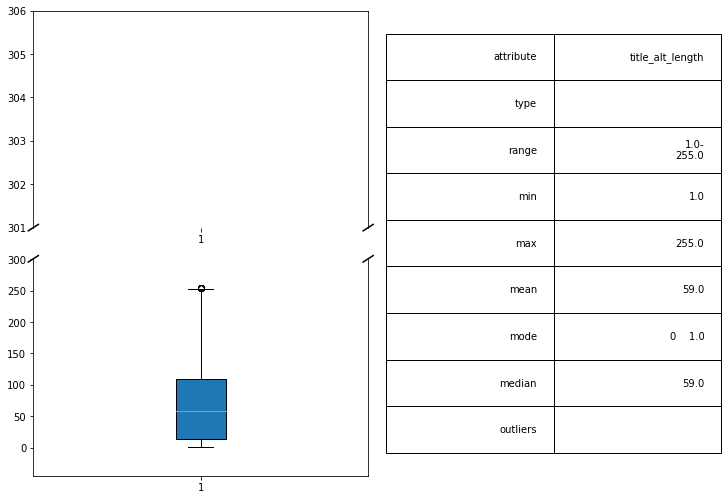

In [147]:
products['title_alt_length'] = products['title_alt'].str.len()
products.loc[ (products['title_alt_length'].isnull()) ,'title_alt_length'] = 1

attributes = ['title_alt_length']
box_plot_table('product',attributes)

###### those values that their length are smaller than 3 are not valid so are set to nan

In [148]:
not_valid_title_alt = products[ (products['title_alt_length']<3) ]      # not valid values
products.loc[ (products['title_alt_length']<3) ,'title_alt'] = np.nan
print(products.loc[8362]['product_title_fa'])
print(type(products.loc[8362]['product_title_en']))
not_valid_title_alt


nan
<class 'float'>


,id,product_title_fa,product_title_en,url_code,title_alt,category_title_fa,category_keywords,brand_name_fa,brand_name_en,product_attributes,product_title_fa_length,product_title_en_length,url_code_length,title_alt_length
2,727096,روغن مرطوب کننده کدلی مدل Divine oil حجم 50 میلی لیتر,NaN,روغن-مرطوب-کننده-کدلی-مدل-divine-oil-حجم-50-میلی-لیتر,NaN,روغن صورت,روغن صورت Face-Oil,کدلی,CAUDALIE,"[{""Key"":""حجم"",""Value"":""50""},{""Key"":""نوع عصاره"",""Value"":""حاوی روغن هسته انگور ارگانیک، روغن آرگان، روغن کنجد و شی باتر""},{""Key"":""عصاره"",""Value"":""دارد""},{""Key"":""ویژگی"",""Value"":""ضد چروک""},{""Key"":""ویت...",53,NaN,53.0,1.0
11,724686,تاپ زنانه لیدی مدل TANKTOP-SJ-GREEN,NaN,تاپ-زنانه-لیدی-مدل-tanktop-sj-green,NaN,تاپ، تونیک و سارافون زنانه,تاپ، تونیک و سارافون زنانه womens-tops-tunics,متفرقه,Miscellaneous,"[{""Key"":""وزن"",""Value"":""100""},{""Key"":""جنس"",""Value"":""کتان""},{""Key"":""جنس"",""Value"":""پنبه""},{""Key"":""نوع یقه"",""Value"":""گرد""},{""Key"":""پد"",""Value"":""ندارد""},{""Key"":""کشور مبدا برند"",""Value"":""ایران""},{""Key"":...",35,NaN,35.0,1.0
16,726596,مانتو زنانه ولیعصر مدل آلاله 17413,NaN,مانتو-زنانه-ولیعصر-مدل-آلاله-17413,NaN,مانتو,مانتو womens-manteaus,مانتو ولیعصر,manto valiasr,"[{""Key"":""تعداد جیب"",""Value"":""0""},{""Key"":""کشور مبدا برند"",""Value"":""ایران""},{""Key"":""مورد استفاده"",""Value"":""روزمره""},{""Key"":""سایر توضیحات"",""Value"":""- جنس پارچه : شانتون\r\n- یقه مردانه\r\n- کمر برش د...",34,NaN,34.0,1.0
26,723711,ظرف بنشن لیمون مدل 7033,NaN,ظرف-بنشن-لیمون-مدل-7033,NaN,ظروف بنشن,ظروف بنشن LegumeContainer,لیمون,limon,"[{""Key"":""گنجایش"",""Value"":""1""},{""Key"":""قابلیت شستشو"",""Value"":""دستی""},{""Key"":""قابلیت شستشو"",""Value"":""ماشین ظرفشویی""},{""Key"":""جنس پایه""},{""Key"":""ابعاد"",""Value"":""7×16×20""},{""Key"":""وزن بسته‌بندی"",""Valu...",23,NaN,23.0,1.0
33,727422,دوربین مداربسته بی سیم EasyN مدل 187,NaN,دوربین-مداربسته-بی-سیم-easyn-مدل-187,NaN,دوربین های تحت شبکه,دوربین های تحت شبکه Network-Cam,متفرقه,Miscellaneous,"[{""Key"":""رزولوشن‌های تصویر"",""Value"":""1080*1920 1080p\r\n""},{""Key"":""مشخصات اتصال"",""Value"":""IEEE802.11b\/g\/n""},{""Key"":""قابلیت بزرگنمایی دیجیتال"",""Value"":""دارد""},{""Key"":""نوع دوربین"",""Value"":""تحت ش...",36,NaN,36.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,768061,ظرف خلال دندان رادین مدل خرگوش DGA-2032,NaN,ظرف-خلال-دندان-رادین-مدل-خرگوش-dga-2032,NaN,ارگانایزر,ارگانایزر Organizer,متفرقه,Miscellaneous,NaN,39,NaN,39.0,1.0
99986,763733,کاور آکو مدل K152 مناسب برای گوشی موبایل سامسونگ S8 plus,NaN,کاور-آکو-مدل-k152-مناسب-برای-گوشی-موبایل-سامسونگ-s8-plus,NaN,کیف و کاور گوشی,کیف و کاور گوشی Cell-Phone-Pouch-Cover,آکو,Ako,NaN,56,NaN,56.0,1.0
99989,817245,شمع مدل 50012,NaN,شمع-مدل-50012,NaN,شمع,شمع Candle,متفرقه,Miscellaneous,NaN,13,NaN,13.0,1.0
99993,796146,پرده مدل pl334,NaN,پرده-مدل-pl334,NaN,پرده,پرده Curtain,متفرقه,Miscellaneous,NaN,14,NaN,14.0,1.0


###### CATEGORY TITLE FA

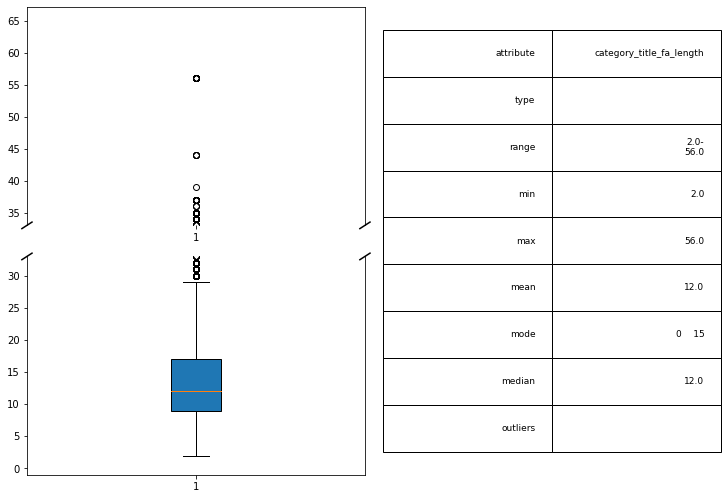

In [149]:
products['category_title_fa_length'] = products['category_title_fa'].str.len()
attributes = ['category_title_fa_length']
box_plot_table('product',attributes)

In [150]:
print("category_title_fa is clear for validity inherently")

category_title_fa is clear for validity inherently


###### CATEGORY KEYWORDS

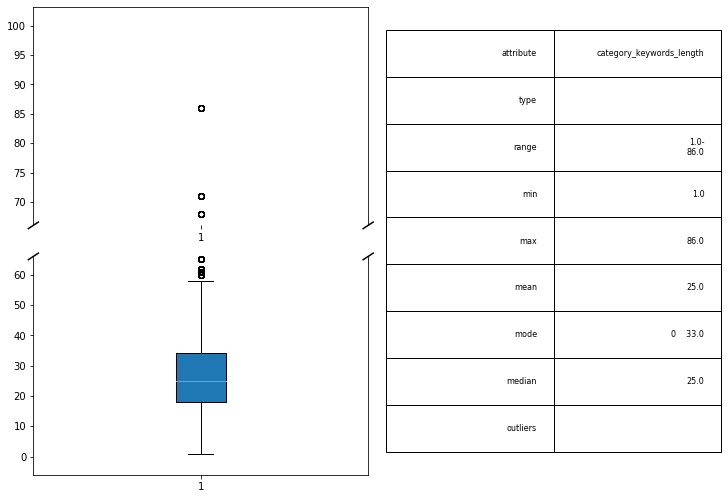

In [151]:
products['category_keywords_length'] = products['category_keywords'].str.len()
products.loc[ (products['category_keywords_length'].isnull()) ,'category_keywords_length'] = 1
attributes = ['category_keywords_length']
box_plot_table('product',attributes)

In [152]:
print("category keywrods is clear for validity inherently")

category keywrods is clear for validity inherently


###### BRAND NAME FA

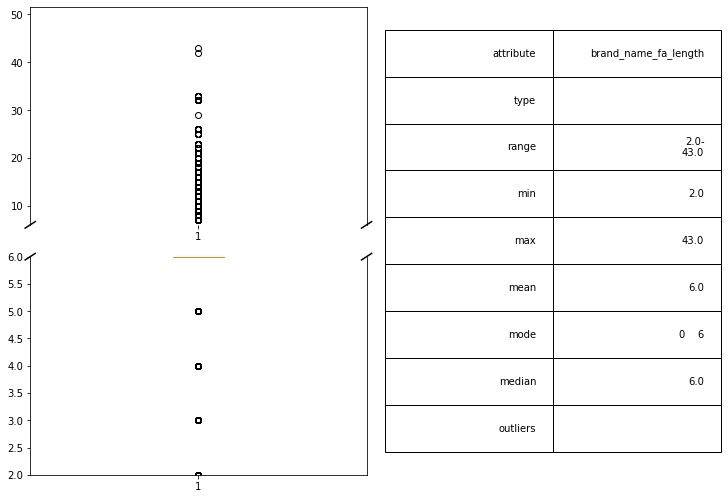

In [153]:
products['brand_name_fa_length'] = products['brand_name_fa'].str.len()
attributes = ['brand_name_fa_length']
box_plot_table('product',attributes)

In [154]:
print("brand name fa is clear for validity inherently")


brand name fa is clear for validity inherently


###### BRAND NAME EN

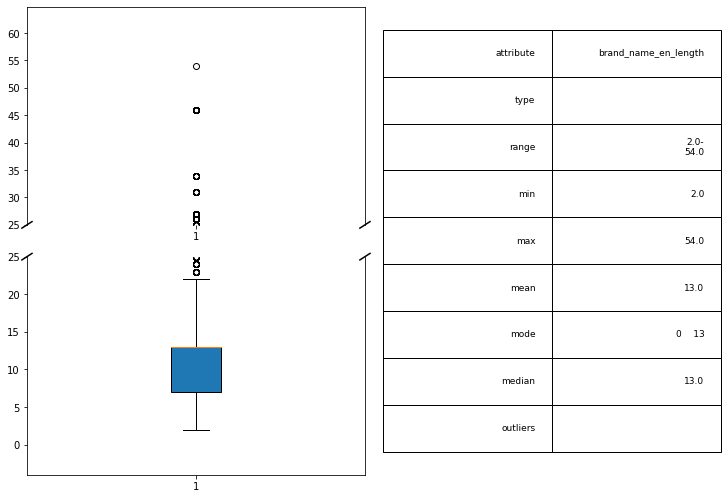

In [155]:
products['brand_name_en_length'] = products['brand_name_en'].str.len()
attributes = ['brand_name_en_length']
box_plot_table('product',attributes)

In [156]:
print("brand name en is clear for validity inherently")


brand name en is clear for validity inherently


###### PRODUCT ATTRUBURES

<ipython-input-135-a251f6938e71>:54: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax1_down.set_ylim(min_value-(mean-q1),q3+(2*(q3-q1)))


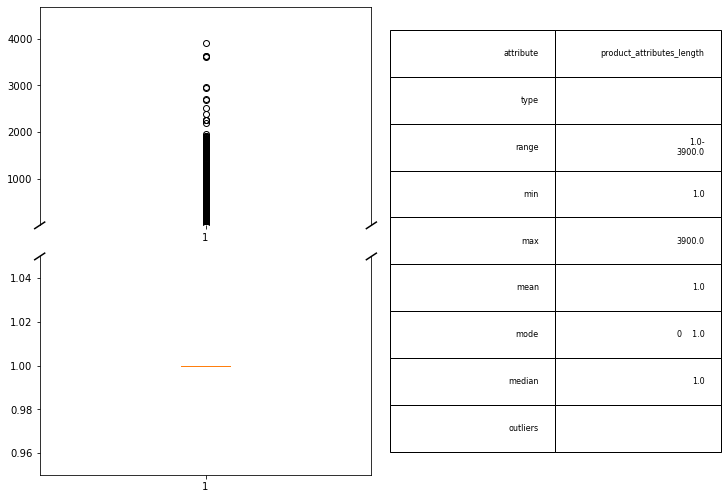

In [157]:
products['product_attributes_length'] = products['product_attributes'].str.len()
products.loc[ (products['product_attributes_length'].isnull()) ,'product_attributes_length'] = 1

attributes = ['product_attributes_length']
box_plot_table('product',attributes)



In [158]:
print("product attributes is clear for validity inherently")

product attributes is clear for validity inherently


In [159]:
products.to_csv('product/product.csv')
data.remove_from_DFrames(['product'])

## ORDERS

In [160]:
data = Data()
data_frames = data.load_into_DFrames({'orders':'csv'})
orders = data_frames['orders']
orders.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0


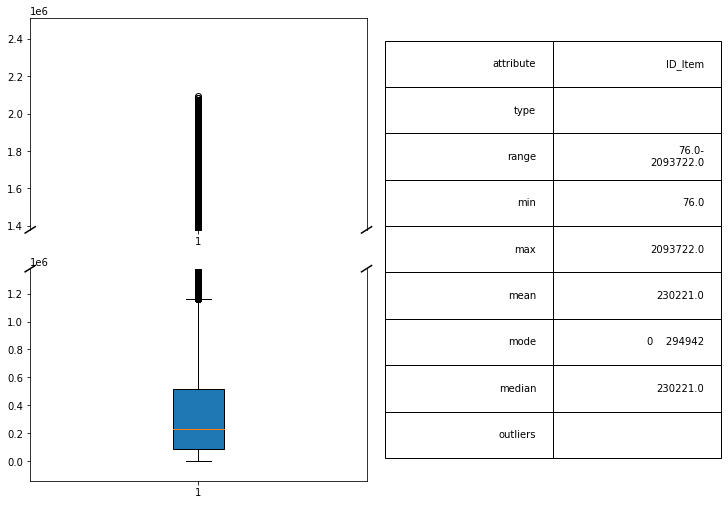

In [161]:
attributes = ['ID_Item']
box_plot_table('orders',attributes)

###### AMOUNT OF GROSSS
i coudlnt make any decision on it because i didnt know about its meaning maybe its better to remove it from table

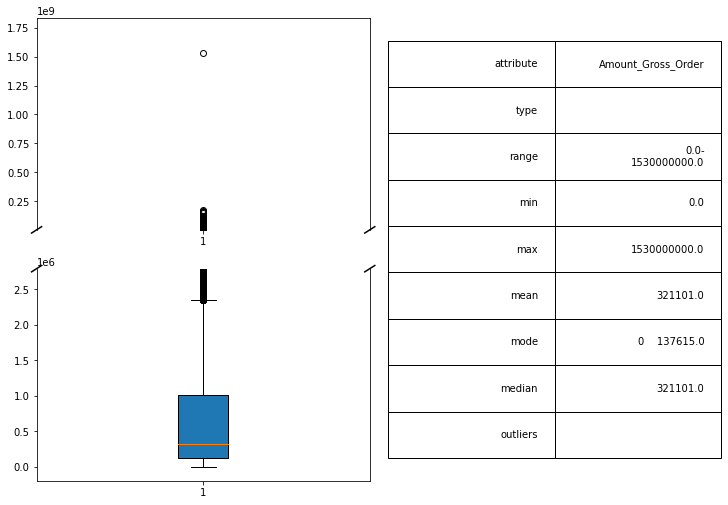

In [162]:
attributes = ['Amount_Gross_Order']
box_plot_table('orders',attributes)

###### DateTime_CartFinalize
extract year,month,day,hour,minute and second from datetime cart finalize ans store in seperate columns

In [163]:
import datetime
orders['DateTime_CartFinalize'] = pd.to_datetime(orders.DateTime_CartFinalize)
orders_P = orders.apply(lambda x:pd.Series([x.DateTime_CartFinalize.year,
                                            x.DateTime_CartFinalize.month,
                                            x.DateTime_CartFinalize.day,
                                            x.DateTime_CartFinalize.hour,
                                            x.DateTime_CartFinalize.minute,
                                            x.DateTime_CartFinalize.second],
                                           index=['year_CartFinalize',
                                                  'month_CartFinalize',
                                                  'day_CartFinalize',
                                                 'hour_CartFinalize',
                                                  'minute_CartFinalize',
                                                 'second_CartFinalize']), axis = 1)


In [164]:
orders = pd.concat([orders,orders_P],axis=1)
orders

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,year_CartFinalize,month_CartFinalize,day_CartFinalize,hour_CartFinalize,minute_CartFinalize,second_CartFinalize
0,2714054,469662,21386,2015-10-15 08:50:56,597982.0,محمود آباد,1.0,2015,10,15,8,50,56
1,11104039,3063877,248497,2018-02-11 00:29:26,980000.0,خرمدره,1.0,2018,2,11,0,29,26
2,4228130,3184893,50144,2016-06-14 00:30:08,229358.0,قرچک,1.0,2016,6,14,0,30,8
3,22225624,6888562,70208,2018-09-03 14:37:19,16514.0,قم,1.0,2018,9,3,14,37,19
4,4068771,2533490,67627,2016-05-21 11:51:02,133028.0,تهران,1.0,2016,5,21,11,51,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,12172771,4403268,445940,2018-04-03 12:07:01,344037.0,تهران,2.0,2018,4,3,12,7,1
199996,4425393,3745774,131645,2016-07-09 19:14:09,600000.0,محمدیه,1.0,2016,7,9,19,14,9
199997,6671889,4845514,215045,2017-03-08 23:47:06,450000.0,اصفهان,1.0,2017,3,8,23,47,6
199998,6315995,2541418,264021,2017-02-08 14:59:39,193486.0,همدان,1.0,2017,2,8,14,59,39


###### year

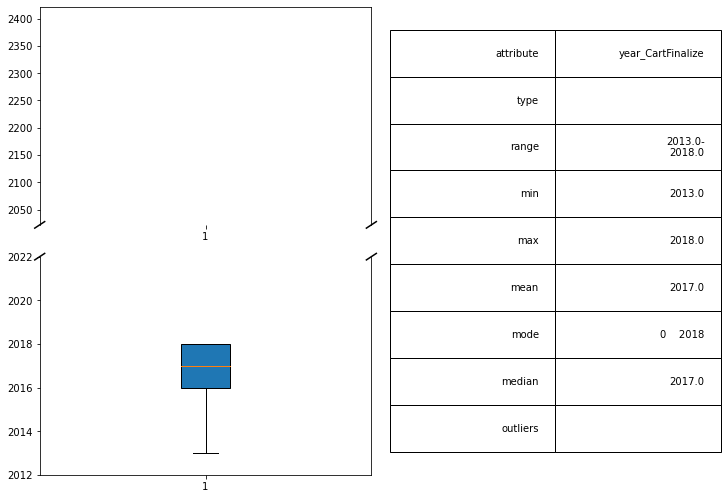

In [165]:
data.data_frames['orders'] = orders
attributes = ['year_CartFinalize']
box_plot_table('orders',attributes)

In [166]:
print("year and day and month is clear for validity inherently")

year and day and month is clear for validity inherently


###### QUNATITY ITEM
it is clear for validation

<ipython-input-135-a251f6938e71>:54: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax1_down.set_ylim(min_value-(mean-q1),q3+(2*(q3-q1)))


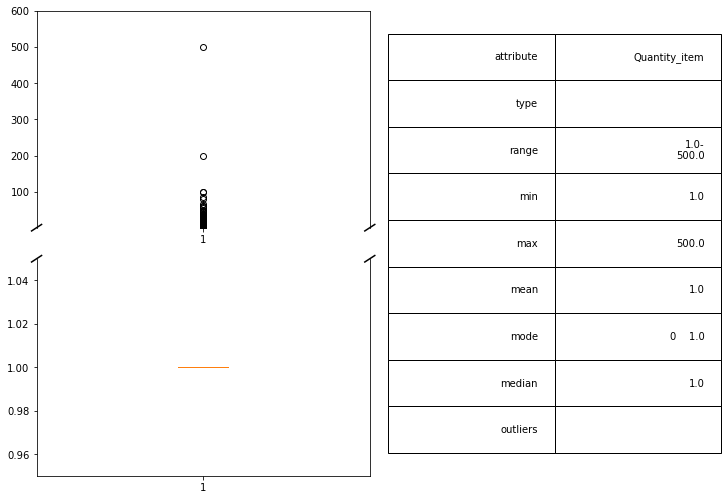

In [167]:
attributes = ['Quantity_item']
box_plot_table('orders',attributes)

In [168]:
products.to_csv('product/product.csv')
data.remove_from_DFrames(['orders'])

## COMMENTS

In [169]:
data.load_into_DFrames({'comment':'xlsx'})
comments = data.data_frames['comment']
data.data_frames['comment'].head(3)

,product_id,confirmed_at,comment
0,90213,2018-08-23 11:05:47,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موضوع مهم اشاره کنم که نظراتی که ما برای کالاها ثبت میکنیم خیلی مهم هستن، چون بسیاری از مردم عزیز با استناد به این نظرات یک کالا رو خریداری میکنن. پس بهت...
1,56871,2018-08-23 10:21:53,بوی تند ولی خوشبو داره.ماندگاریش خوبه و هر چقدر میگذره خوشبوتر میشه..
2,49738,2018-10-13 11:13:39,متاسفانه عمر مفید این ماشین کم هست و بعد از دو سال دیگه با باطری کار نمیکنه و گیر میکنه به نحوی که هیچیک از دکمه ها کار نمیکنه تا چند ساعت در این حالت میمونه دوباره با اتصال به برق کار میکنه


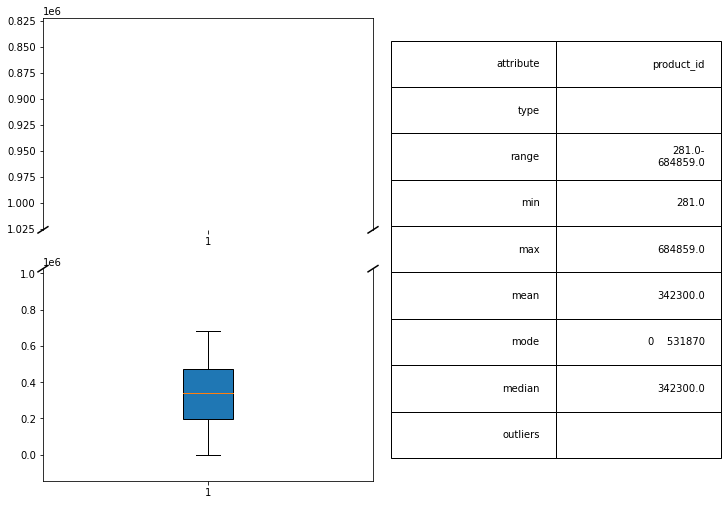

In [170]:
attributes = ['product_id']
box_plot_table('comment',attributes)

###### COMMENT

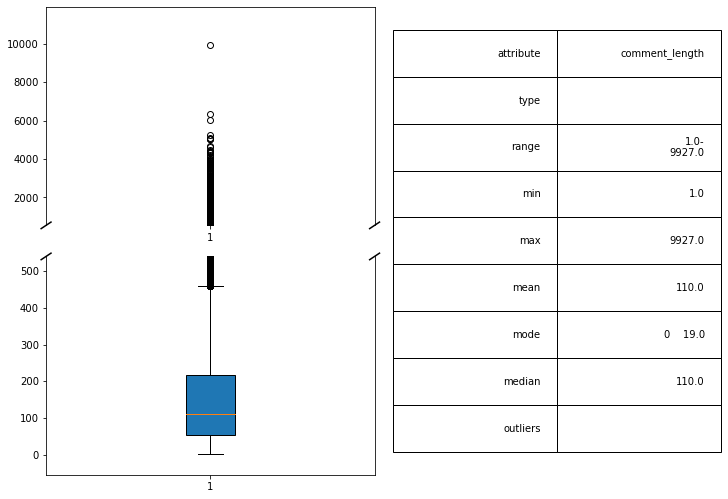

In [171]:
comments['comment_length'] = comments.comment.str.len()
comments.loc[comments.comment_length.isnull(),'comment_length'] = 1
data.data_frames['comment'] = comments
attributes = ['comment_length']
box_plot_table('comment',attributes)

In [172]:
data.remove_from_DFrames(['comment'])

## TARIKHCHE KHARID

In [173]:
data.load_into_DFrames({'tarikhche kharid':'csv'})
tarikhche_kharid = data.data_frames['tarikhche kharid']
data.data_frames['tarikhche kharid'].head(3)

,id,product_variant_id,selling_price,rrp_price,base_price,buy_price,order_limit,start_at,end_at,tags,show_in_price_history,active,created_at,product_id,marketplace_seller_id
0,18752043,1977385,850000,850000,\N,\N,1,\N,\N,\N,1,1,2018-11-26 18:59:52,667969,2962
1,18752022,1977380,12550000,12550000,\N,\N,2,\N,\N,\N,1,0,2018-11-26 18:59:31,150144,78525
2,18752046,1977380,12500000,12500000,\N,\N,2,\N,\N,\N,1,1,2018-11-26 18:59:55,150144,78525


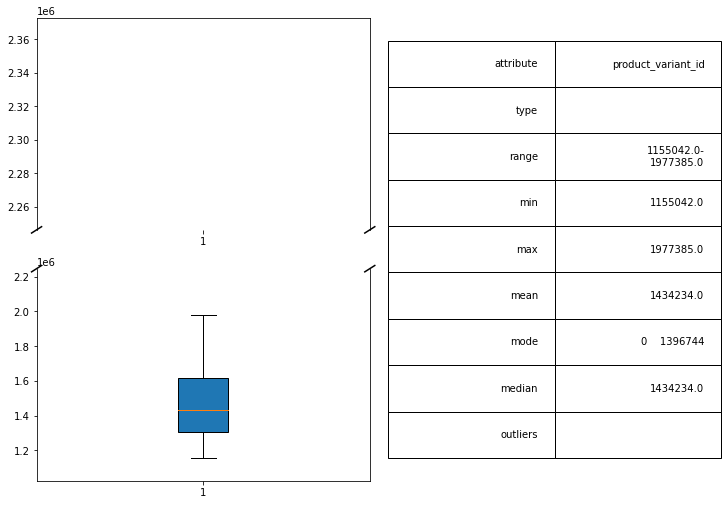

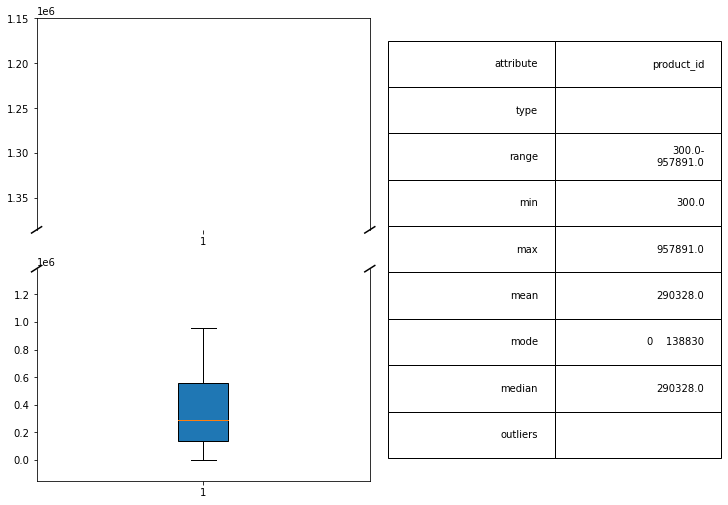

In [174]:
attributes = ['product_variant_id','product_id']
box_plot_table('tarikhche kharid',attributes)

###### SELLING PRICE

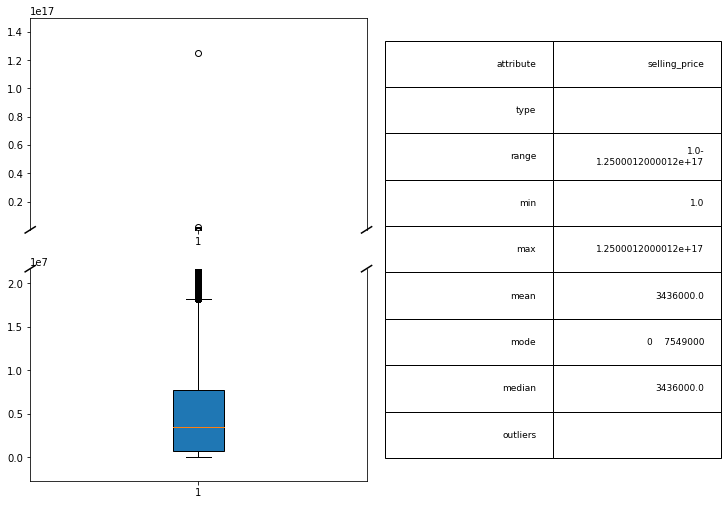

In [175]:
attributes = ['selling_price']
box_plot_table('tarikhche kharid',attributes)

###### those values that are smaller than 1000 are invalid so are set to nan

In [176]:
tarikhche_kharid.loc[tarikhche_kharid['selling_price'] < 1000,'selling_price'] = np.nan

###### RRP PRICE

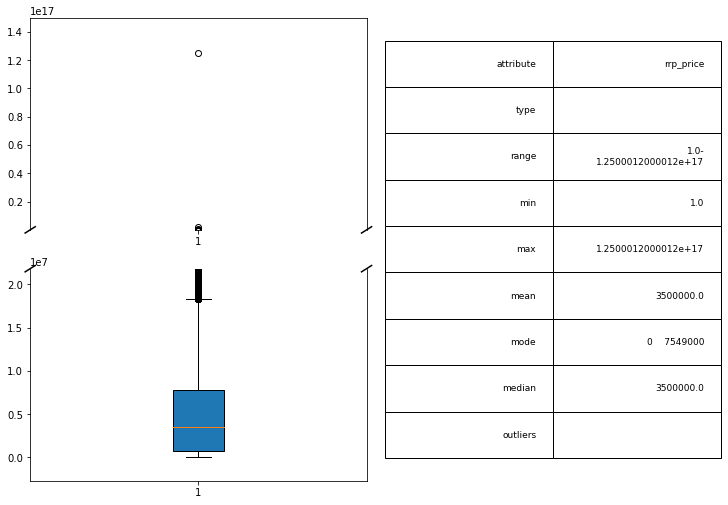

In [177]:
attributes = ['rrp_price']
box_plot_table('tarikhche kharid',attributes)

###### those values that are smaller than 1000 are invalid so are set to nan

In [178]:
tarikhche_kharid.loc[tarikhche_kharid['rrp_price']<1000,'rrp_price'] = np.nan

###### BASE PRICE

###### almost the whole columns is null ==>> removve it

In [179]:
len(tarikhche_kharid.base_price.isnull()) == len(tarikhche_kharid)

True

###### BUY PRICE

###### almost the whole columns is null ==>> removve it

In [180]:
len(tarikhche_kharid.buy_price.isnull()) == len(tarikhche_kharid)

True

###### ORDER LIMIT

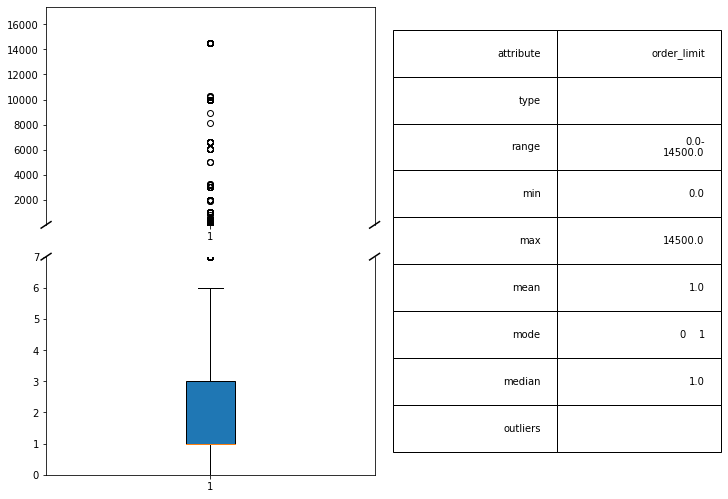

In [181]:
attributes = ['order_limit']
box_plot_table('tarikhche kharid',attributes)

In [182]:
print("order limit is clear for validation")

order limit is clear for validation


###### SHOW IN PRICE

In [183]:
print("in show in price column there is no value except boolean so its clear for validity")

in show in price column there is no value except boolean so its clear for validity


###### ACTIVE

In [184]:
print("in active column there is no value except boolean so its clear for validity")

in active column there is no value except boolean so its clear for validity


## KEIFIAT

In [185]:
data.load_into_DFrames({'keifiat':'xlsx'})
keifiat = data.data_frames['keifiat']
data.data_frames['keifiat'].head(3)

,product_id,product_title,title_en,user_id,likes,dislikes,verification_status,recommend,title,comment,advantages,disadvantages
0,3692,ماوس بی‌سیم لاجیتک مدل M325,IT,989472,0,0,verified,\N,NaN,واقعا عالیه. من که ازش خیلی راضیم,NaN,NaN
1,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 10000 میلی آمپر ساعت,AC,3862150,4,1,verified,recommended,واقعاً عالیه,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موضوع مهم اشاره کنم که نظراتی که ما برای کالاها ثبت میکنیم خیلی مهم هستن، چون بسیاری از مردم عزیز با استناد به این نظرات یک کالا رو خریداری میکنن. پس بهت...,"[""عمر طولانی\r"",""افت بسیار کم میزان شارژ\r"",""امپر خروجی هوشمند متناسب با امپر گوشی""]","[""ندارد""]"
2,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,HW,626843,1,0,verified,not_recommended,خیلی سخت حوله اش در میاد,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را خیلی سخت می توان در آورد \r\n\r\nمهسان یه مدل دیگه داره که پلاستیکی هست و خیلی ساده و راحت خم می شود\r\n\r\nبه نظرم تولید این طرح را باید متوقف کنن چ...,NaN,NaN


###### PRODUCT TITLE

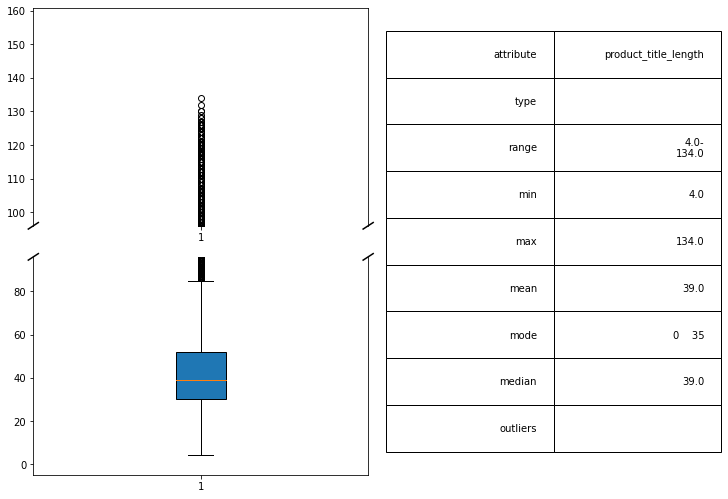

In [186]:
keifiat['product_title_length'] = keifiat['product_title'].str.len()
attributes = ['product_title_length']
box_plot_table('keifiat',attributes)

In [187]:
print("product title is clear it was checked by length")

product title is clear it was checked by length


###### LIKES
its clear for validation

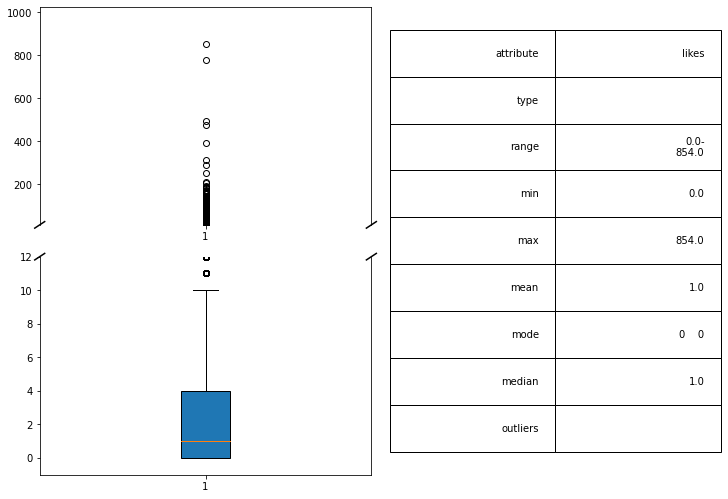

In [188]:
attributes = ['likes']
box_plot_table('keifiat',attributes)

###### DISLIKES
its clear for validation

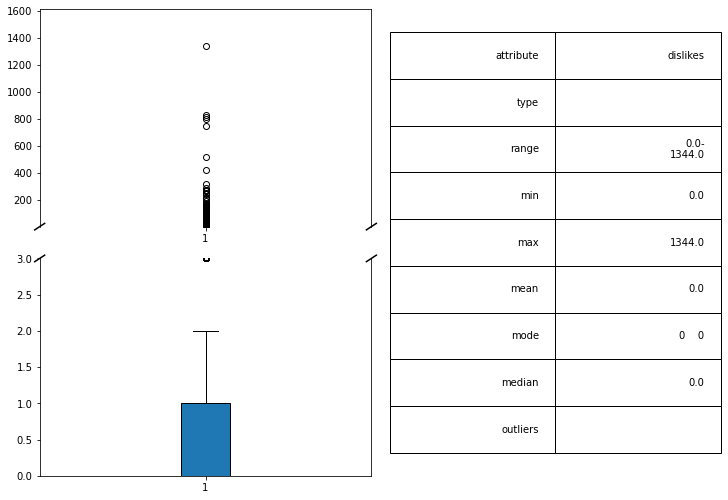

In [189]:
attributes = ['dislikes']
box_plot_table('keifiat',attributes)

###### VERIFICATION STATUS

In [193]:
notVerified_or_rejected = keifiat[keifiat['verification_status']!="verified"]
rejected = notVerified_or_rejected[notVerified_or_rejected['verification_status']!="not_verified"]
print("verification status is clear for validation")
print(len(rejected[rejected['verification_status']!="rejected"]))

verification status is clear for validation
0


###### RECOMMENDED

In [194]:
keifiat.loc[keifiat['recommend']=='\\N','recommend'] = np.nan
notRecommended_or_noIdea = keifiat[keifiat['recommend']!="recommended"]
noIdea = notRecommended_or_noIdea[notRecommended_or_noIdea['recommend']!="not_recommended"]
print("recommend is clear for validation")
print(len(noIdea[noIdea['recommend']!="no_idea"])==len(keifiat[keifiat['recommend'].isnull()]))
keifiat.head(3)

recommend is clear for validation
True


,product_id,product_title,title_en,user_id,likes,dislikes,verification_status,recommend,title,comment,advantages,disadvantages,product_title_length
0,3692,ماوس بی‌سیم لاجیتک مدل M325,IT,989472,0,0,verified,NaN,NaN,واقعا عالیه. من که ازش خیلی راضیم,NaN,NaN,27
1,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 10000 میلی آمپر ساعت,AC,3862150,4,1,verified,recommended,واقعاً عالیه,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موضوع مهم اشاره کنم که نظراتی که ما برای کالاها ثبت میکنیم خیلی مهم هستن، چون بسیاری از مردم عزیز با استناد به این نظرات یک کالا رو خریداری میکنن. پس بهت...,"[""عمر طولانی\r"",""افت بسیار کم میزان شارژ\r"",""امپر خروجی هوشمند متناسب با امپر گوشی""]","[""ندارد""]",62
2,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,HW,626843,1,0,verified,not_recommended,خیلی سخت حوله اش در میاد,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را خیلی سخت می توان در آورد \r\n\r\nمهسان یه مدل دیگه داره که پلاستیکی هست و خیلی ساده و راحت خم می شود\r\n\r\nبه نظرم تولید این طرح را باید متوقف کنن چ...,NaN,NaN,37


###### TITLE

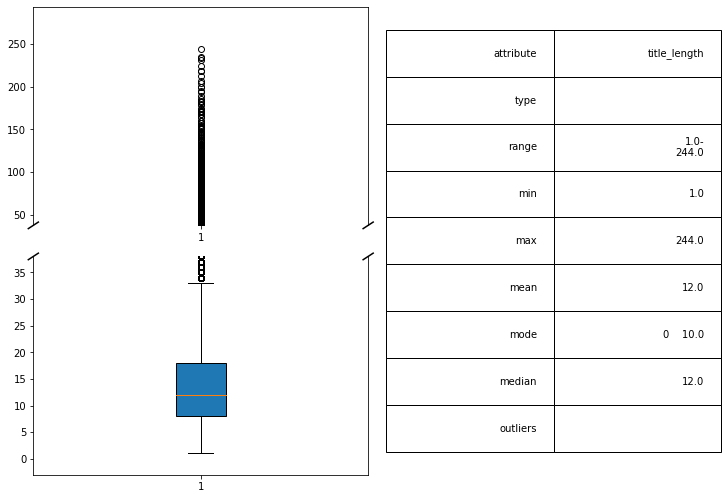

In [195]:
keifiat['title_length'] = keifiat['title'].str.len()
keifiat.loc[keifiat['title_length'].isnull(),'title_length'] = 1
attributes = ['title_length']
box_plot_table('keifiat',attributes)

In [196]:
print("title is clear for validation but there is some not correct values")

title is clear for validation but there is some not correct values


###### COMMENT

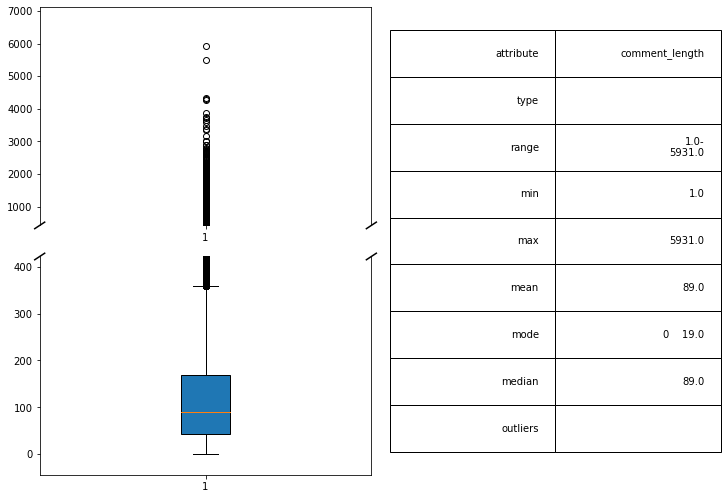

In [197]:
keifiat['comment_length'] = keifiat['comment'].str.len()
keifiat.loc[keifiat['comment_length'].isnull(),'comment_length'] = 1
attributes = ['comment_length']
box_plot_table('keifiat',attributes)

###### values that their length is smaller than 3 are set to nan

In [198]:
keifiat.loc[keifiat['comment_length']<3,'comment'] = np.nan

###### ADVANTAGES

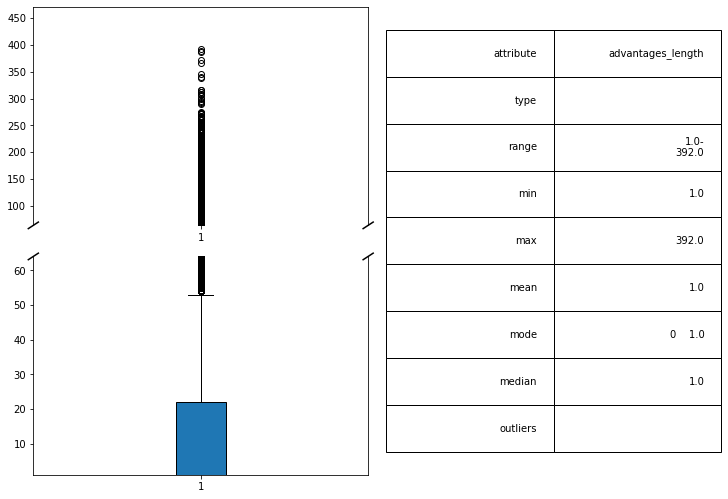

In [199]:
keifiat['advantages_length'] = keifiat['advantages'].str.len()
keifiat.loc[keifiat['advantages_length'].isnull(),'advantages_length'] = 1
attributes = ['advantages_length']
box_plot_table('keifiat',attributes)

In [200]:
print("advantages is clear for validation")
keifiat[keifiat['advantages_length']<3].head(3)

advantages is clear for validation


,product_id,product_title,title_en,user_id,likes,dislikes,verification_status,recommend,title,comment,advantages,disadvantages,product_title_length,title_length,comment_length,advantages_length
0,3692,ماوس بی‌سیم لاجیتک مدل M325,IT,989472,0,0,verified,NaN,NaN,واقعا عالیه. من که ازش خیلی راضیم,NaN,NaN,27,1.0,33.0,1.0
2,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,HW,626843,1,0,verified,not_recommended,خیلی سخت حوله اش در میاد,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را خیلی سخت می توان در آورد \r\n\r\nمهسان یه مدل دیگه داره که پلاستیکی هست و خیلی ساده و راحت خم می شود\r\n\r\nبه نظرم تولید این طرح را باید متوقف کنن چ...,NaN,NaN,37,24.0,282.0,1.0
7,56871,ادو پرفیوم زنانه امپر مدل Chifon حجم 100 میلی لیتر,PC,1139954,2,2,verified,NaN,عطر...,بوی تند ولی خوشبو داره.ماندگاریش خوبه و هر چقدر میگذره خوشبوتر میشه..,NaN,NaN,50,6.0,69.0,1.0


###### DISADVANTAGES

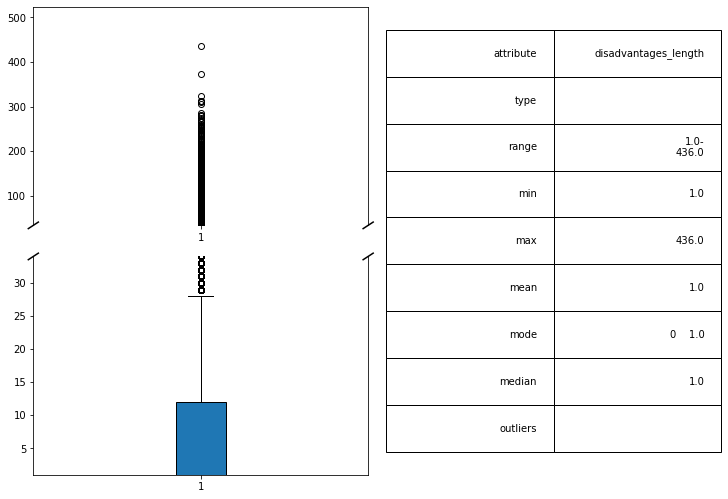

In [201]:
keifiat['disadvantages_length'] = keifiat['disadvantages'].str.len()
keifiat.loc[keifiat['disadvantages_length'].isnull(),'disadvantages_length'] = 1
attributes = ['disadvantages_length']
box_plot_table('keifiat',attributes)

In [202]:
print("disadvantages is clear for validation")
keifiat[keifiat['disadvantages_length']<3].head(3)

disadvantages is clear for validation


,product_id,product_title,title_en,user_id,likes,dislikes,verification_status,recommend,title,comment,advantages,disadvantages,product_title_length,title_length,comment_length,advantages_length,disadvantages_length
0,3692,ماوس بی‌سیم لاجیتک مدل M325,IT,989472,0,0,verified,NaN,NaN,واقعا عالیه. من که ازش خیلی راضیم,NaN,NaN,27,1.0,33.0,1.0,1.0
2,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,HW,626843,1,0,verified,not_recommended,خیلی سخت حوله اش در میاد,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را خیلی سخت می توان در آورد \r\n\r\nمهسان یه مدل دیگه داره که پلاستیکی هست و خیلی ساده و راحت خم می شود\r\n\r\nبه نظرم تولید این طرح را باید متوقف کنن چ...,NaN,NaN,37,24.0,282.0,1.0,1.0
7,56871,ادو پرفیوم زنانه امپر مدل Chifon حجم 100 میلی لیتر,PC,1139954,2,2,verified,NaN,عطر...,بوی تند ولی خوشبو داره.ماندگاریش خوبه و هر چقدر میگذره خوشبوتر میشه..,NaN,NaN,50,6.0,69.0,1.0,1.0


## Data Correctness

<div style="direction:rtl">
    برای بررسی صحت داده ها میتوان از هر یک از 4 روش زیر استفاده کرد :
    <br>
    
1.	مقادیر min و max 
    <br>
برای متغیر های continuous بررسی مقادیر min و max میتواند محدوده ای که داده ها در آن صحیح به شمار میروند را بدست آورد. این مقادیر را میتوان از طریق field expert و یا هم با تخمین درست به دست آورد، وابسته به پیچیدگی و اهمیت متغیر است.
 به طور مثال برای Amount_Gross_Order کمتیرین مقدار میتواند صفر و بیشترین مقدار 100   میلیارد مد نظر  میگیریم اگر مقدار داده ای خارج از این محدوده باشد غلط است.
    <br>
2.	بررسی مقادیر تهی
        <br>
آسانترین روش برای بررسی این موضوع استفاده از تابع count  است.
    <br>
3.	بررسی مقادیر متغیرهای categorical
        <br>
در هنگام جمع آوری داده مشکلات و بی دقتی های زیاد میتواند منجر به خطا شود. بک راه  سریع برای بررسی صحت مقادبر این متفیر ها تهیه لیستی از مقادیر مجاز برای crosscheck کردن با متغیر متناظر آن است. مانند city_name_fa برای بررسی آن میتوان یک لیست  مجاز شهر های ایران را تهیه کرد و برای هر Entry چک کرد که آیا در لیست موجود است و یا خیر.
    <br>
4.	بررسی نرخ تکرار مقادیر متغیرهای binary
        <br>
در صورتیکه در دتاست خود از این نوع متغیر داریم میتوانیم با استقاده از mean(incidence rate) بررسی کنیم که آیا این متغیر به درستی مقدار دهی شده است یا خیر. یک خطای معمول برای این نوع از متفیر ها تعیین مقدار 1 و null عوض 1 و 0 است، به آسانی قابا شناسایی است زبرا Rate خود متغیر با 1 یکسان میشود.
</div>

## Data Completeness

### formula 1
A: records with no missing attribute  
B: Total records in dataset

In [228]:
def calc_f1(df_in):
    is_NaN = df_in.isnull()
    row_has_NaN = is_NaN.any(axis=1)
    rows_with_NaN = df_in[row_has_NaN]
    a = df_in.shape[0]-rows_with_NaN.shape[0]
    b = df_in.shape[0]
    return a/b

In [229]:
# num_null_rows = sum([True for idx,row in products.iterrows() if any(row.isnull())])
products_f1 = calc_f1(products)
print(products_f1)

0.00518


In [230]:
orders_f1 = calc_f1(orders)
print(orders_f1)


1.0


In [231]:
comments_f1 = calc_f1(comments)
print(comments_f1)


0.9989500839932806


In [232]:
tarikhche_kharid_f1 = calc_f1(tarikhche_kharid)
print(tarikhche_kharid_f1)
tarikhche_kharid_correct.head(1)

0.9996278082621988


,selling_price,rrp_price,order_limit,show_in_price_history,active,created_at
0,850000.0,850000.0,1,1,1,2018-11-26 18:59:52


In [233]:
keifiat_f1 = calc_f1(keifiat)
print(keifiat_f1)
keifiat_correct.head(3)

0.18816


,product_title,title_en,likes,dislikes,verification_status,recommend,title,comment,disadvantages,product_title_length,title_length,comment_length,advantages_length,disadvantages_length
0,ماوس بی‌سیم لاجیتک مدل M325,IT,0,0,verified,NaN,NaN,واقعا عالیه. من که ازش خیلی راضیم,NaN,27,1.0,33.0,1.0,1.0
1,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 10000 میلی آمپر ساعت,AC,4,1,verified,recommended,واقعاً عالیه,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موضوع مهم اشاره کنم که نظراتی که ما برای کالاها ثبت میکنیم خیلی مهم هستن، چون بسیاری از مردم عزیز با استناد به این نظرات یک کالا رو خریداری میکنن. پس بهت...,"[""ندارد""]",62,12.0,963.0,84.0,9.0
2,یدک پولیشر میکروفایبر مهسان مدل 20119,HW,1,0,verified,not_recommended,خیلی سخت حوله اش در میاد,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را خیلی سخت می توان در آورد \r\n\r\nمهسان یه مدل دیگه داره که پلاستیکی هست و خیلی ساده و راحت خم می شود\r\n\r\nبه نظرم تولید این طرح را باید متوقف کنن چ...,NaN,37,24.0,282.0,1.0,1.0


### formula 2
A: # of data required for the particular context  
B: # of data in the specified filed

In [234]:
products_correct = products.drop(columns=['id'])
products_f2 = calc_f1(products_correct)
print(products_f2)

0.00518


In [235]:
orders_correct = orders.drop(columns=['ID_Order', 'ID_Customer', 'ID_Item'])
orders_f2 = calc_f1(orders_correct)
print(orders_f2)

1.0


In [236]:
comments_correct = comments.drop(columns=['product_id'])
comments_f2 = calc_f1(comments_correct)
print(comments_f2)

0.9989500839932806


In [237]:
tarikhche_kharid_correct = tarikhche_kharid.drop(columns=['id', 'product_variant_id', 'product_id', 'marketplace_seller_id',
                                                         'base_price', 'buy_price', 'start_at', 'end_at', 'tags'])
tarikhche_kharid_f2 = calc_f1(tarikhche_kharid_correct)
print(tarikhche_kharid_f2)

0.9996278082621988


In [238]:
keifiat_correct = keifiat.drop(columns=['product_id', 'user_id'])
keifiat_f2 = calc_f1(keifiat_correct)
print(keifiat_f2)
keifiat_correct.head(3)

0.18816


,product_title,title_en,likes,dislikes,verification_status,recommend,title,comment,advantages,disadvantages,product_title_length,title_length,comment_length,advantages_length,disadvantages_length
0,ماوس بی‌سیم لاجیتک مدل M325,IT,0,0,verified,NaN,NaN,واقعا عالیه. من که ازش خیلی راضیم,NaN,NaN,27,1.0,33.0,1.0,1.0
1,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 10000 میلی آمپر ساعت,AC,4,1,verified,recommended,واقعاً عالیه,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موضوع مهم اشاره کنم که نظراتی که ما برای کالاها ثبت میکنیم خیلی مهم هستن، چون بسیاری از مردم عزیز با استناد به این نظرات یک کالا رو خریداری میکنن. پس بهت...,"[""عمر طولانی\r"",""افت بسیار کم میزان شارژ\r"",""امپر خروجی هوشمند متناسب با امپر گوشی""]","[""ندارد""]",62,12.0,963.0,84.0,9.0
2,یدک پولیشر میکروفایبر مهسان مدل 20119,HW,1,0,verified,not_recommended,خیلی سخت حوله اش در میاد,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را خیلی سخت می توان در آورد \r\n\r\nمهسان یه مدل دیگه داره که پلاستیکی هست و خیلی ساده و راحت خم می شود\r\n\r\nبه نظرم تولید این طرح را باید متوقف کنن چ...,NaN,NaN,37,24.0,282.0,1.0,1.0


### formula 3
A: attribute fields containing values  
B: records * attributes

In [240]:
def calc_f3(df_in):
    total_nan=df_in.isnull().sum().sum()
    b = df_in.shape[0] * df_in.shape[1]
    a = b - total_nan
    return a/b

In [243]:
products_f3 = calc_f3(products_correct)
print(products_f3)

0.8452988888888889


In [244]:
orders_f3 = calc_f3(orders_correct)
print(orders_f3)

1.0


In [245]:
comments_f3 = calc_f3(comments_correct)
print(comments_f3)

0.9996500279977601


In [246]:
tarikhche_kharid_f3 = calc_f3(tarikhche_kharid_correct)
print(tarikhche_kharid_f3)

0.9998826504934936


In [248]:
keifiat_f3 = calc_f3(keifiat_correct)
print(keifiat_f3)

0.891046


# Phase Two
## Finding patterns